In [67]:
import sklearn
import pandas as pd
import numpy as np


In [77]:
#WorldCupMatches_conv = dict(Datetime= )
drop_em = ['Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials', 'Stadium', 'City']
WorldCupMatches = pd.read_csv('WorldCupMatches.csv', nrows =852, parse_dates=[1] ).drop(axis=1, labels=drop_em )
WorldCupPlayers = pd.read_csv('WorldCupPlayers.csv')
WorldCups = pd.read_csv('WorldCups.csv')
WorldCupMatches

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
0,1930,1930-07-13 15:00:00,Group 1,France,4,1,Mexico,,4444.0,3,0,201,1096
1,1930,1930-07-13 15:00:00,Group 4,USA,3,0,Belgium,,18346.0,2,0,201,1090
2,1930,1930-07-14 12:45:00,Group 2,Yugoslavia,2,1,Brazil,,24059.0,2,0,201,1093
3,1930,1930-07-14 14:50:00,Group 3,Romania,3,1,Peru,,2549.0,1,0,201,1098
4,1930,1930-07-15 16:00:00,Group 1,Argentina,1,0,France,,23409.0,0,0,201,1085
5,1930,1930-07-16 14:45:00,Group 1,Chile,3,0,Mexico,,9249.0,1,0,201,1095
6,1930,1930-07-17 12:45:00,Group 2,Yugoslavia,4,0,Bolivia,,18306.0,0,0,201,1092
7,1930,1930-07-17 14:45:00,Group 4,USA,3,0,Paraguay,,18306.0,2,0,201,1097
8,1930,1930-07-18 14:30:00,Group 3,Uruguay,1,0,Peru,,57735.0,0,0,201,1099
9,1930,1930-07-19 12:50:00,Group 1,Chile,1,0,France,,2000.0,0,0,201,1094


In [70]:
groups= np.isin(WorldCupMatches['Stage'], ['Group B', 'Group 1', 'Group A', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 
                                           'Group 6', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'])
WorldCupMatches.loc[groups,'Stage'] = 'Groups'
third = np.isin(WorldCupMatches['Stage'], ['Match for third place', 'Third place', 'Play-off for third place'])
WorldCupMatches.loc[third,'Stage'] = 'Thirds'
WorldCupMatches['Stage'].value_counts()

Groups               622
Round of 16           72
Quarter-finals        66
Semi-finals           36
Final                 20
Thirds                19
First round            9
Preliminary round      8
Name: Stage, dtype: int64

In [71]:
WorldCupMatches['Stage'] = WorldCupMatches['Stage'].astype('category')
WorldCupMatches['Home Team Name'] = WorldCupMatches['Home Team Name'].astype('category')
WorldCupMatches['Away Team Name'] = WorldCupMatches['Away Team Name'].astype('category')

In [73]:
WorldCupMatches[WorldCupMatches['Stage']=='First round']

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
35,1938,1938-06-04 17:00:00,First round,Switzerland,1,1,Germany,,27152.0,0,0,206,1165
36,1938,1938-06-05 17:00:00,First round,Hungary,6,0,Dutch East Indies,,9000.0,4,0,206,1173
37,1938,1938-06-05 17:00:00,First round,France,3,1,Belgium,,30454.0,2,1,206,1146
38,1938,1938-06-05 17:00:00,First round,Cuba,3,3,Romania,,7000.0,0,0,206,1156
39,1938,1938-06-05 17:00:00,First round,Italy,2,1,Norway,Italy win after extra time,19000.0,0,0,206,1179
40,1938,1938-06-05 17:30:00,First round,Brazil,6,5,Poland,Brazil win after extra time,13452.0,0,0,206,1150
41,1938,1938-06-05 18:30:00,First round,Czechoslovakia,3,0,Netherlands,Czechoslovakia win after extra time,11000.0,0,0,206,1172
42,1938,1938-06-09 18:00:00,First round,Cuba,2,1,Romania,,8000.0,0,1,206,1157
43,1938,1938-06-09 18:00:00,First round,Switzerland,4,2,Germany,,20025.0,1,2,206,1166


In [31]:
WorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 13 columns):
Year                    852 non-null int64
Datetime                852 non-null datetime64[ns]
Stage                   852 non-null category
Home Team Name          852 non-null category
Home Team Goals         852 non-null int64
Away Team Goals         852 non-null int64
Away Team Name          852 non-null category
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null int64
Half-time Away Goals    852 non-null int64
RoundID                 852 non-null int64
MatchID                 852 non-null int64
dtypes: category(3), datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 76.2+ KB


In [40]:
WorldCupMatches['Stage'].value_counts()

Round of 16                 72
Quarter-finals              66
Group 1                     62
Group B                     60
Group A                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group D                     48
Group F                     48
Group E                     48
Group C                     48
Semi-finals                 36
Group H                     30
Group G                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Stage, dtype: int64

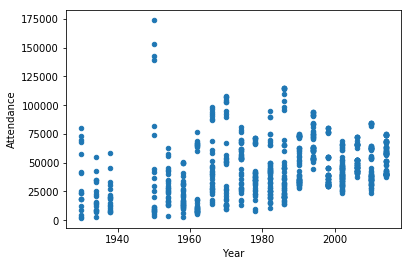

In [41]:
WorldCupMatches.plot.scatter(x='Year', y='Attendance')